# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.

## Notebook overview

This notebook is a guide to start practicing Data Analysis.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np



# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
import sklearn 
import scipy

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# For CSV, use pandas.read_csv
df_train = pd.read_csv("D:\LP2/train.csv")

df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
df_test = pd.read_csv("D:\LP2/test.csv")
df_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

## Main dataset for Analysis

In [5]:
#shape of data

df_train.shape, df_test.shape

((3000888, 6), (28512, 5))

In [6]:
#check for duplicates

df_train.duplicated().sum(), df_test.duplicated().sum()

(0, 0)

In [7]:
# Top 5 column of train dataset
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [8]:
# Top 5 column of test dataset
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [11]:
# check for missing values
df_train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [12]:
df_test.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

## Mini Overview of project

In [13]:
# load summary dateset

df_all = pd.read_csv("D:\LP2/transactions.csv")
df_all

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [14]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [15]:
df_all.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [16]:
df_all["date"] = pd.to_datetime(df_all["date"], format= '%Y/%m/%d')
df_all["date"]

0       2013-01-01
1       2013-01-02
2       2013-01-02
3       2013-01-02
4       2013-01-02
           ...    
83483   2017-08-15
83484   2017-08-15
83485   2017-08-15
83486   2017-08-15
83487   2017-08-15
Name: date, Length: 83488, dtype: datetime64[ns]

In [17]:
df_all["Year"] = df_all['date'].dt.strftime('%Y')
df_all["Month"] = df_all['date'].dt.strftime('%m')
df_all["Month"] = df_all['date'].dt.month_name()
df_all

,date,store_nbr,transactions,Year,Month
0,2013-01-01,25,770,2013,January
1,2013-01-02,1,2111,2013,January
2,2013-01-02,2,2358,2013,January
3,2013-01-02,3,3487,2013,January
4,2013-01-02,4,1922,2013,January
...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,August
83484,2017-08-15,51,1573,2017,August
83485,2017-08-15,52,2255,2017,August
83486,2017-08-15,53,932,2017,August


In [18]:
Transactions_year = df_all.groupby([df_all["date"].dt.year])["transactions"].sum().reset_index() 
Transactions_year

,date,transactions
0,2013,29107173
1,2014,30006929
2,2015,31312370
3,2016,31052337
4,2017,20000136


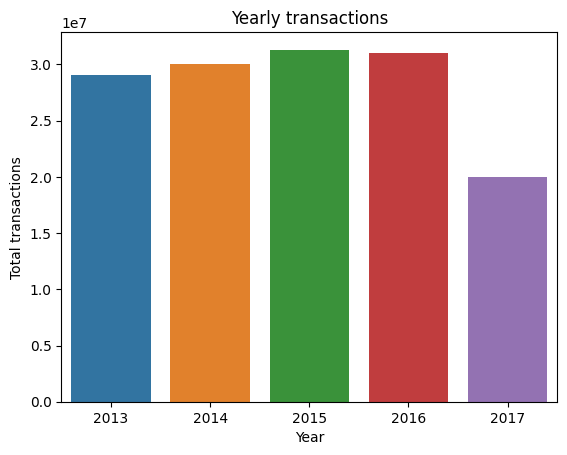

In [19]:
sns.barplot(data=Transactions_year, x="date", y="transactions")
plt.xlabel("Year")
plt.ylabel("Total transactions")
plt.title("Yearly transactions")
plt.show()

In [26]:
Transactions = df_all.groupby(["Year", "Month"])["transactions"].sum().sort_values(ascending=True).reset_index() 
Transactions

,Year,Month,transactions
0,2017,August,1335692
1,2013,February,2169615
2,2014,February,2278167
3,2013,January,2289558
4,2013,April,2344905
5,2015,February,2345984
6,2013,November,2369866
7,2016,January,2371205
8,2013,September,2380462
9,2013,June,2392206


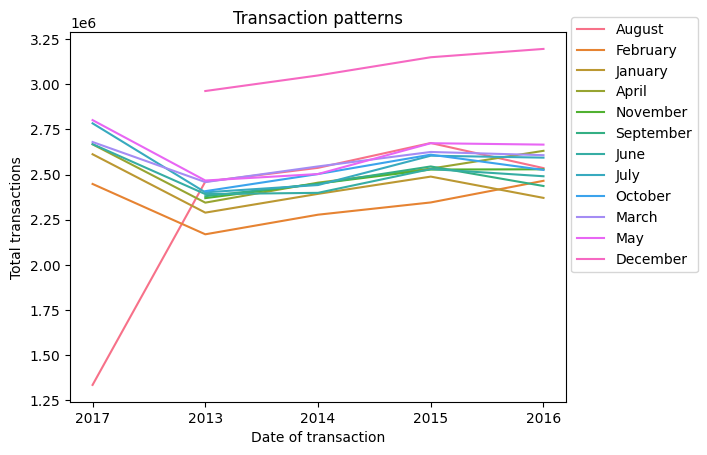

In [27]:
sns.lineplot(data=Transactions, x="Year", y="transactions", hue="Month")
plt.xlabel("Date of transaction")
plt.ylabel("Total transactions")
plt.title("Transaction patterns")
plt.legend(loc=(1.01,.35))
plt.show()

## Insight from mini overview
1. December recorded maximum sales 4 years in a row. NB: Investigate if there was an occurance in december 2017 to ascertain the low transactions
2. 2013 generally had lower sales throughout the various months
3. Febuary records lowest sales.


## Hypothesis

1. Null hypothesis: Product sales are directly correlated with special events.
2. Alternate hypothesis: Product sales are independent of events.

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

In [ ]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [ ]:
# Code here
products = df_train.groupby(["family"]).size()
pd.set_option("display.max_rows", None )
products

family
AUTOMOTIVE                    90936
BABY CARE                     90936
BEAUTY                        90936
BEVERAGES                     90936
BOOKS                         90936
BREAD/BAKERY                  90936
CELEBRATION                   90936
CLEANING                      90936
DAIRY                         90936
DELI                          90936
EGGS                          90936
FROZEN FOODS                  90936
GROCERY I                     90936
GROCERY II                    90936
HARDWARE                      90936
HOME AND KITCHEN I            90936
HOME AND KITCHEN II           90936
HOME APPLIANCES               90936
HOME CARE                     90936
LADIESWEAR                    90936
LAWN AND GARDEN               90936
LINGERIE                      90936
LIQUOR,WINE,BEER              90936
MAGAZINES                     90936
MEATS                         90936
PERSONAL CARE                 90936
PET SUPPLIES                  90936
PLAYERS AND ELECTRONI

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

In [ ]:
# Code here

# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

## Missing/NaN Values
Handle the missing/NaN values using the Scikif-learn SimpleImputer

In [ ]:
# Code Here

## Scaling
Scale the numeric features using the Scikif-learn StandardScaler, MinMaxScaler, or another Scaler.

In [ ]:
# Code here

## Encoding
Encode the categorical features using the Scikif-learn OneHotEncoder.

In [ ]:
# Code here